In [11]:
# data processing
import pandas as pd 

# data visualization
import seaborn as sns
#matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator

#Statistics package
from scipy import stats

#Linear regression
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#Categorises according to the statistical significance
def stars(p):
    if p < 0.0001:
        return "****"
    elif (p < 0.001):
        return "***"
    elif (p < 0.01):
        return "**"
    elif (p < 0.05):
        return "*"
    else:
        return "ns"

In [12]:
df = pd.read_csv('Results.csv')
#Separate controls and all data
Control_df=df[df.P!='Control']
All_df=df
df=df[df.P!='Control']
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 295
Data columns (total 14 columns):
P                 252 non-null object
#                 252 non-null int64
Repeat_no         252 non-null float64
Control           252 non-null object
Date              252 non-null object
Age               252 non-null int64
Induction_time    252 non-null object
Lose_TR_time      252 non-null object
RR_beats          252 non-null float64
RR_breaths        252 non-null float64
SL                252 non-null float64
TT_movement       240 non-null object
TT_Recovery       240 non-null object
Recovery          252 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 29.5+ KB


In [13]:
#Inspect the first 5 rows 

from datetime import datetime

sequence = ['Induction_time','Lose_TR_time','TT_movement','TT_Recovery']

#Convert to seconds
for i in sequence:
    df[i+'_sec']=df[i].str[3:5].astype(float)*60+df[i].str[-2:].astype(float)
    df[i]=pd.to_datetime(df[i], format='%H:%M:%S')

df['Repeat_no'] = df['Repeat_no'].astype('int64')
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 295
Data columns (total 18 columns):
P                     252 non-null object
#                     252 non-null int64
Repeat_no             252 non-null int64
Control               252 non-null object
Date                  252 non-null object
Age                   252 non-null int64
Induction_time        252 non-null datetime64[ns]
Lose_TR_time          252 non-null datetime64[ns]
RR_beats              252 non-null float64
RR_breaths            252 non-null float64
SL                    252 non-null float64
TT_movement           240 non-null datetime64[ns]
TT_Recovery           240 non-null datetime64[ns]
Recovery              252 non-null object
Induction_time_sec    252 non-null float64
Lose_TR_time_sec      252 non-null float64
TT_movement_sec       240 non-null float64
TT_Recovery_sec       240 non-null float64
dtypes: datetime64[ns](4), float64(7), int64(3), object(4)
memory usage: 37.4+ KB


/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,P,#,Repeat_no,Control,Date,Age,Induction_time,Lose_TR_time,RR_beats,RR_breaths,SL,TT_movement,TT_Recovery,Recovery,Induction_time_sec,Lose_TR_time_sec,TT_movement_sec,TT_Recovery_sec
0,1,1,1,N,15/07/2020,21,1900-01-01 00:00:21,1900-01-01 00:00:44,140.0,0.0,5.5,1900-01-01 00:01:09,1900-01-01 00:01:29,Y,21.0,44.0,69.0,89.0
1,1,2,1,N,15/07/2020,21,1900-01-01 00:00:09,1900-01-01 00:01:06,94.0,0.0,5.5,1900-01-01 00:01:14,1900-01-01 00:01:27,Y,9.0,66.0,74.0,87.0
2,1,3,1,N,15/07/2020,21,1900-01-01 00:00:16,1900-01-01 00:00:30,82.0,78.0,6.0,1900-01-01 00:01:13,1900-01-01 00:01:42,Y,16.0,30.0,73.0,102.0
3,1,4,1,N,15/07/2020,21,1900-01-01 00:00:19,1900-01-01 00:00:29,140.0,144.0,5.0,1900-01-01 00:01:00,1900-01-01 00:01:15,Y,19.0,29.0,60.0,75.0
4,1,5,1,N,15/07/2020,21,1900-01-01 00:00:45,1900-01-01 00:01:05,122.0,64.0,5.0,1900-01-01 00:01:11,1900-01-01 00:01:22,Y,45.0,65.0,71.0,82.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


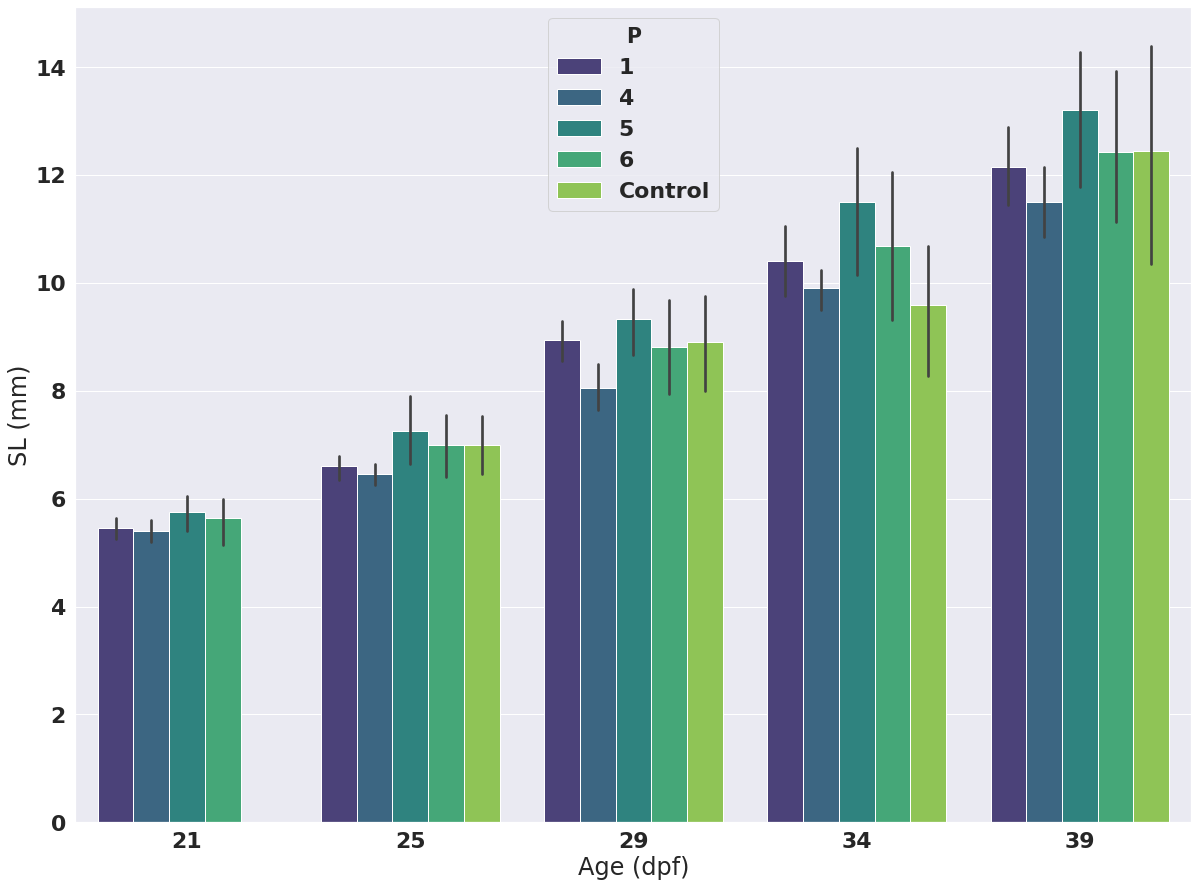

In [14]:
fig, axes = plt.subplots(figsize=(20, 15))

#Drop data points where repeat number is 1 as control
My_df = All_df.drop(All_df[(All_df.Repeat_no < 2) &  (All_df.Age > 21)].index)


#Drop NA values
tips = My_df.dropna(how='all')       
ax=sns.barplot(y='SL', x='Age', 
                 data=tips, 
                 palette="viridis",
                 hue='P')

ax.set_xlabel('Age (dpf)')
ax.set_ylabel('SL (mm)')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}

plt.rc('font', **font)

plt.savefig('Age_size.png', bbox_inches='tight')
plt.savefig('Age_size.eps', bbox_inches='tight')

1
4
5
6


/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/jpo22/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the r

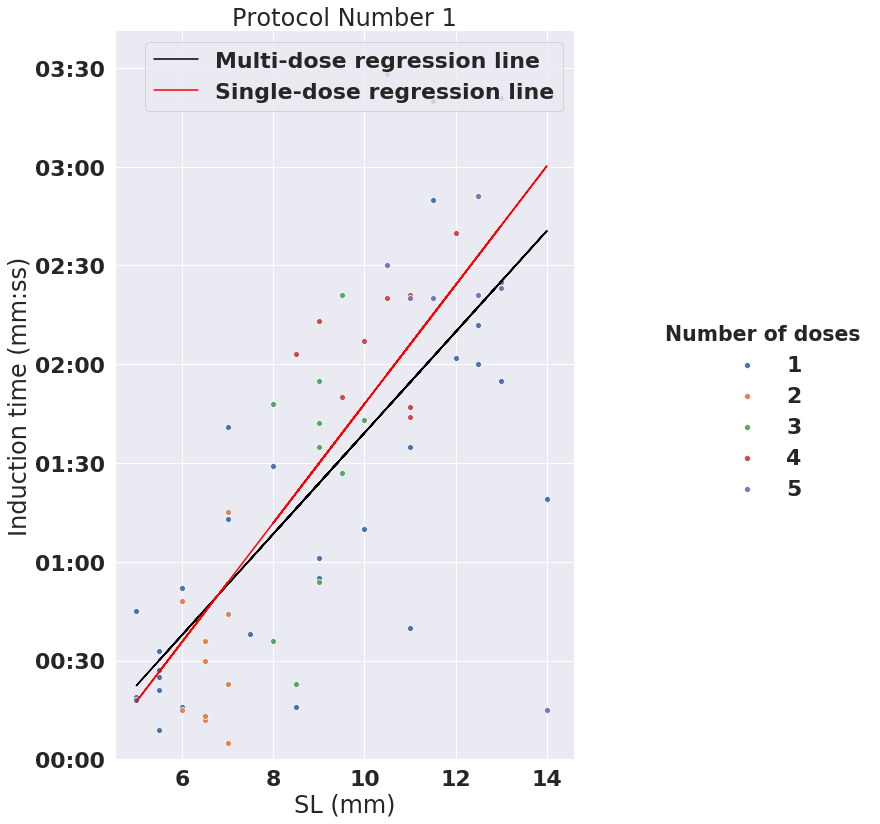

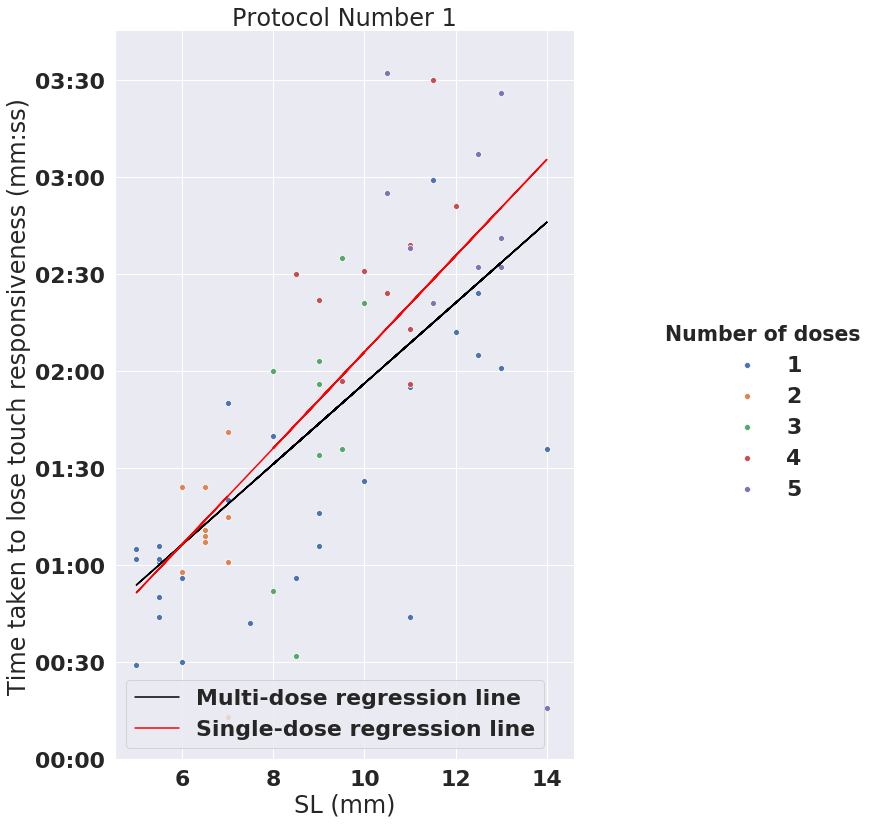

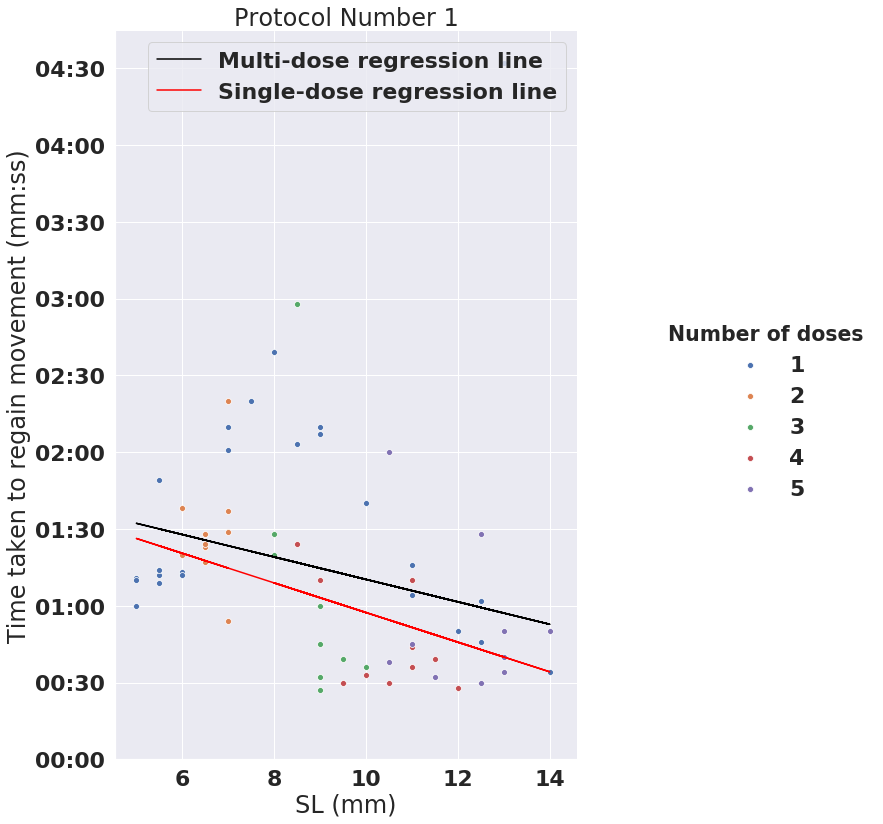

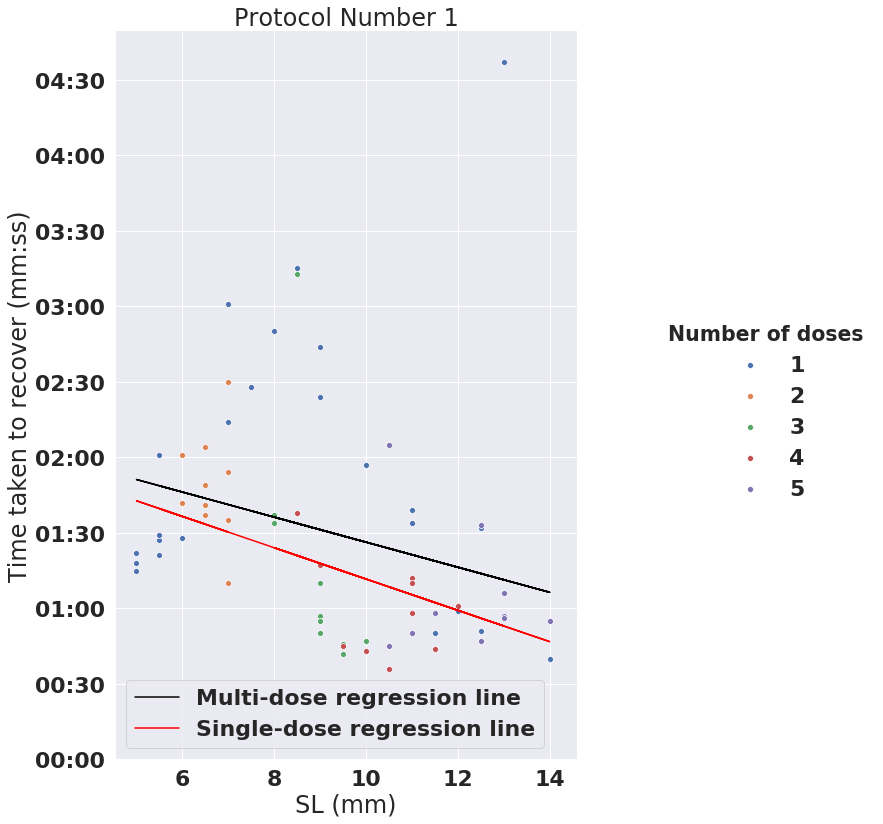

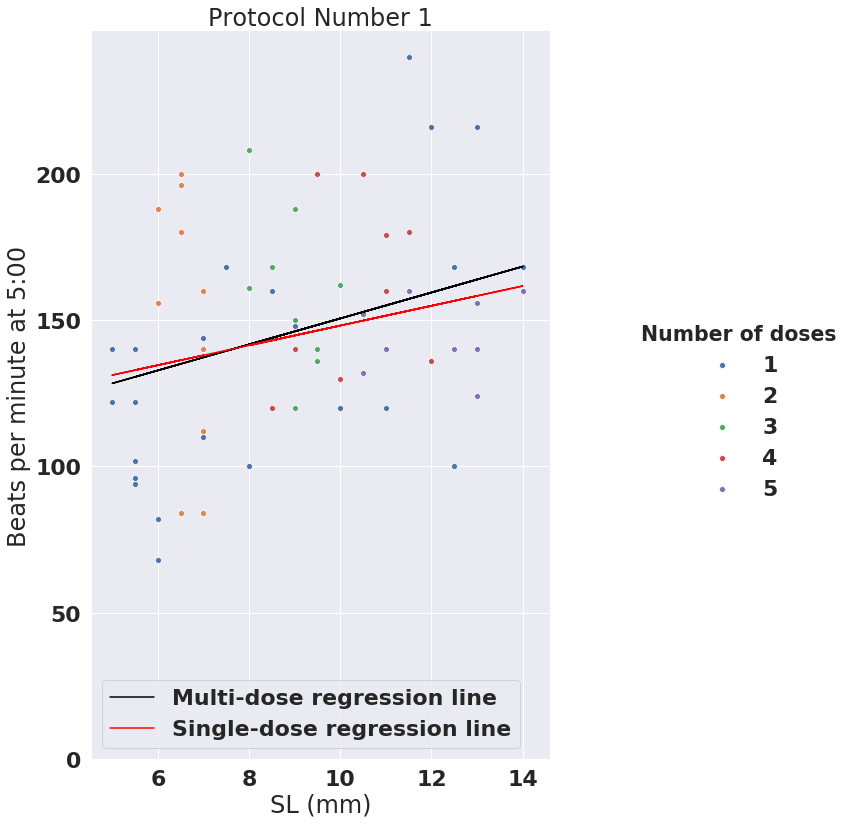

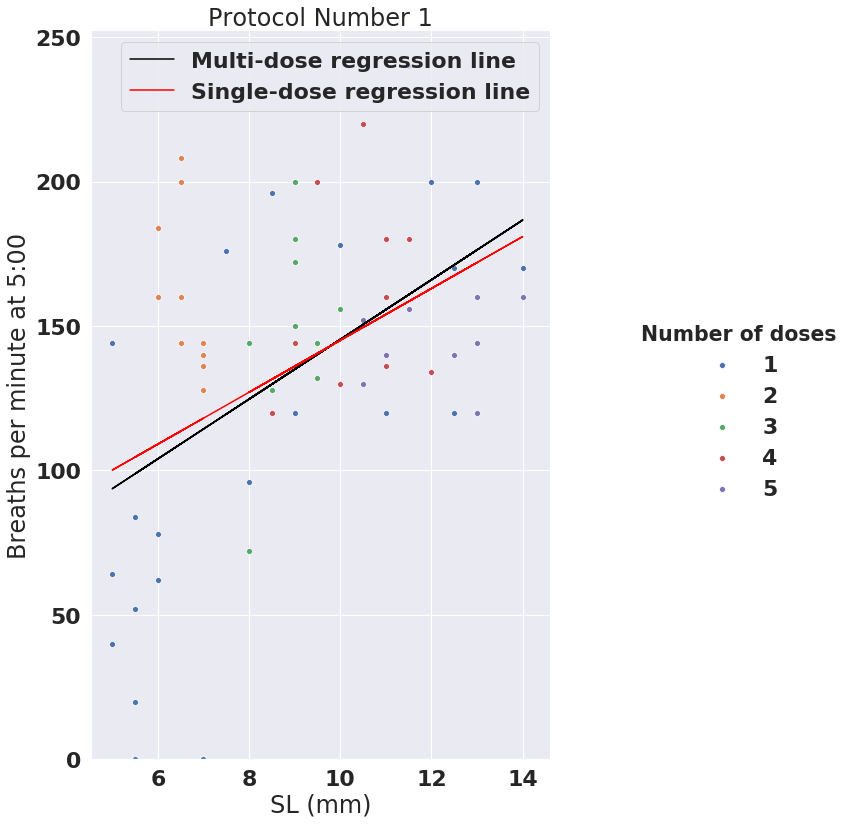

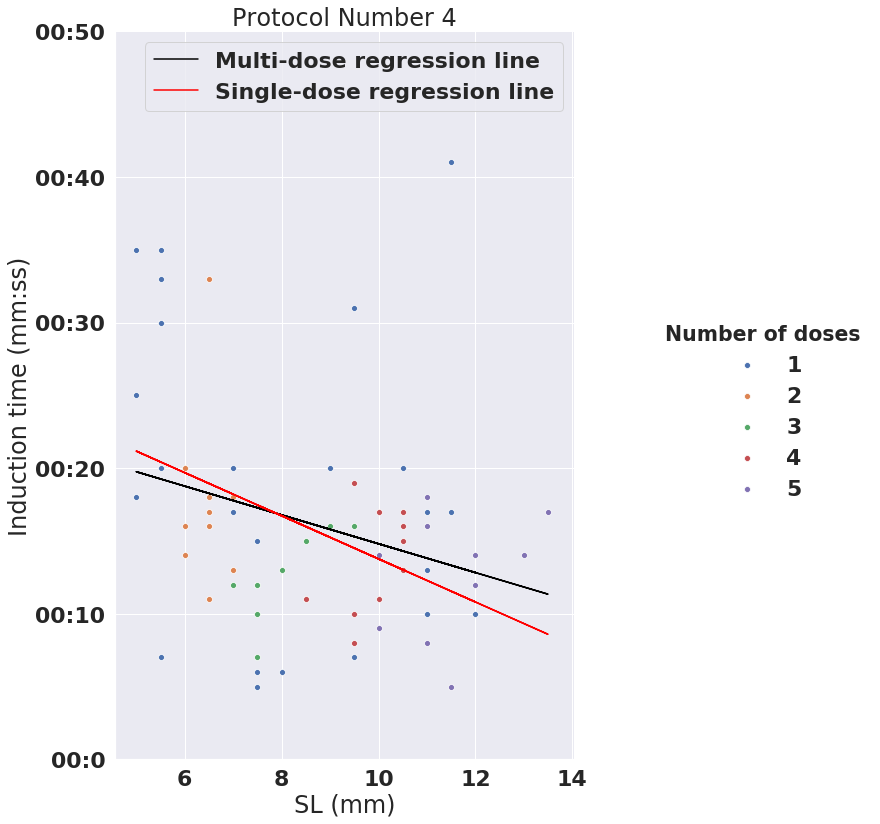

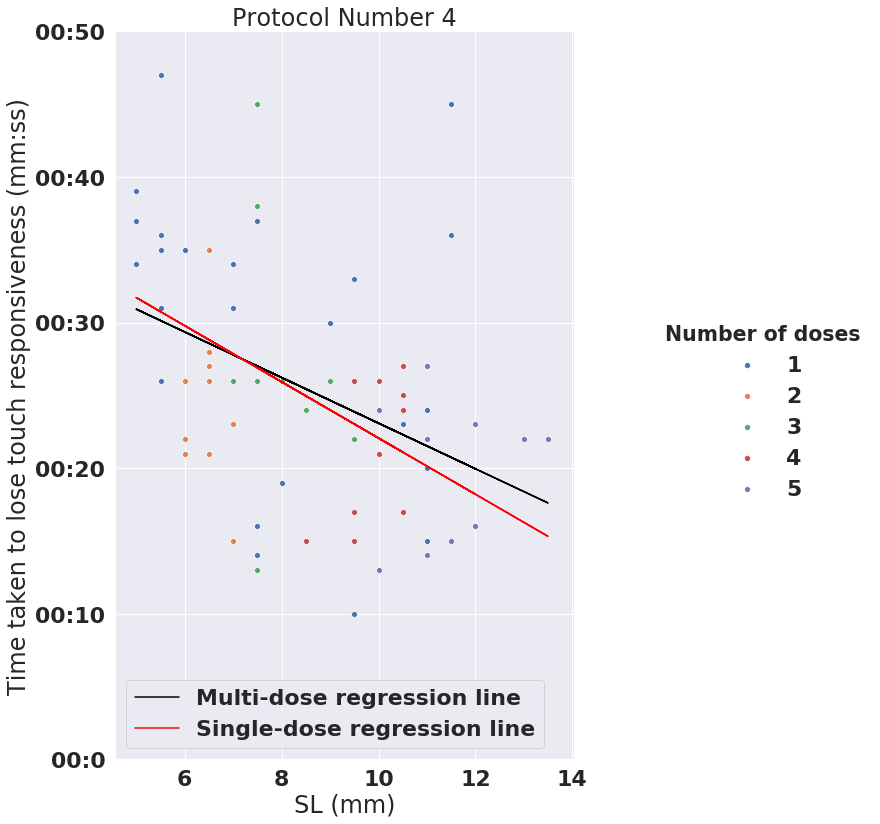

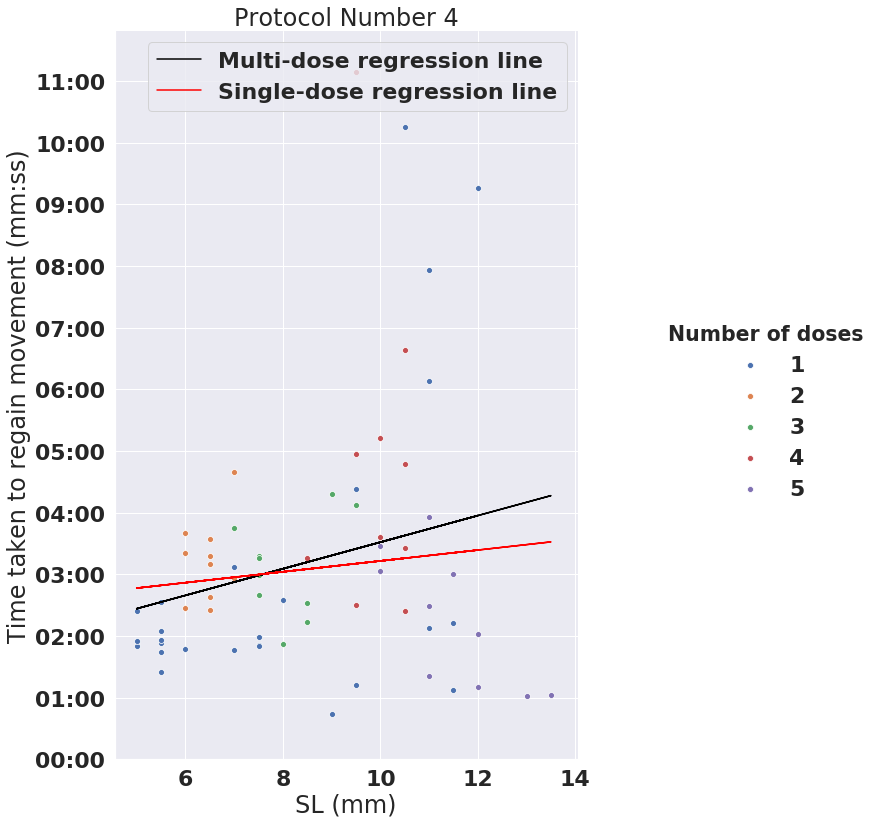

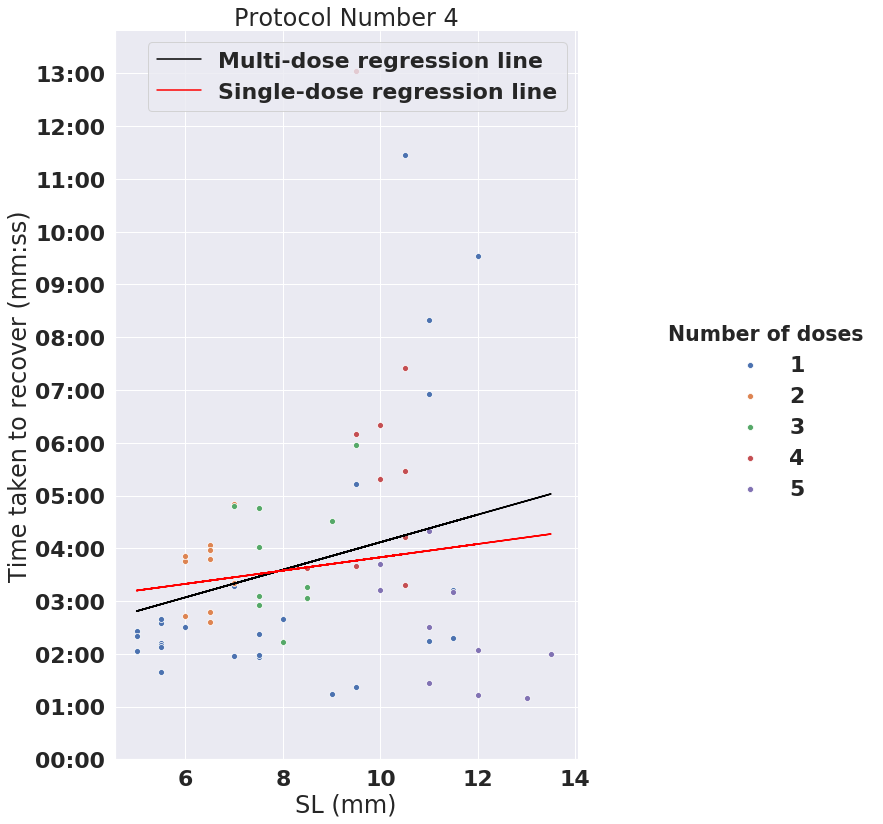

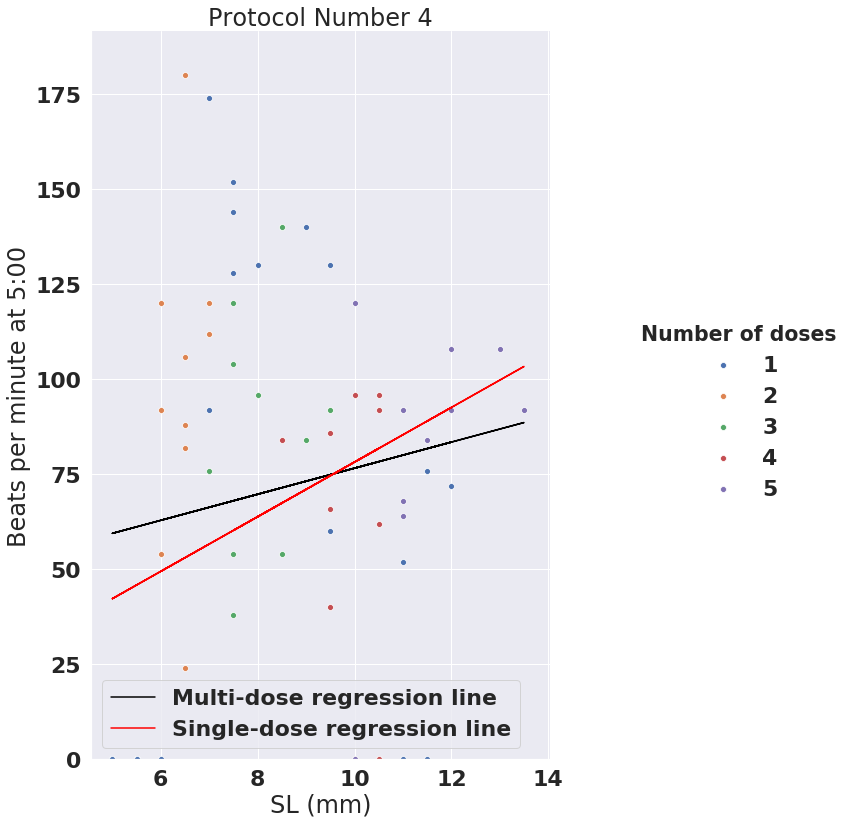

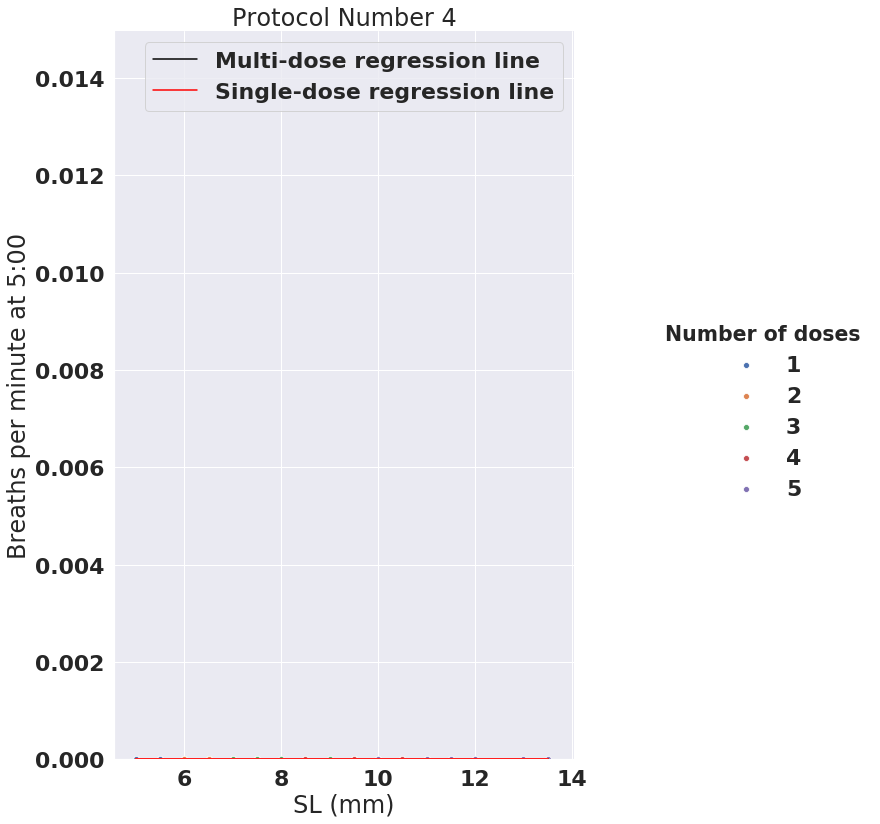

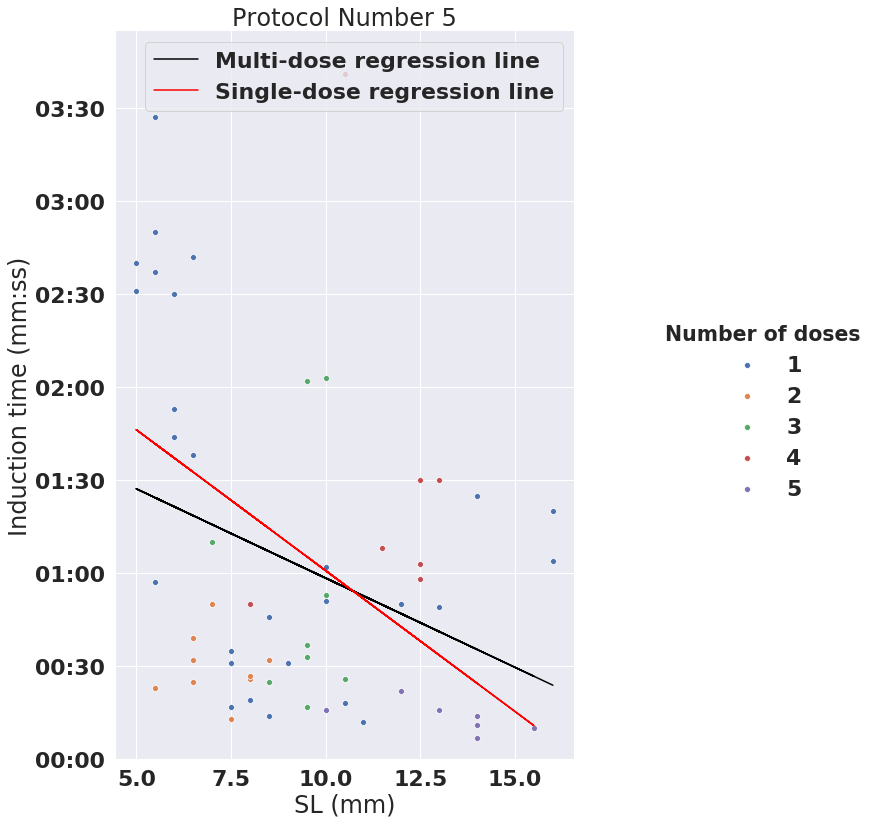

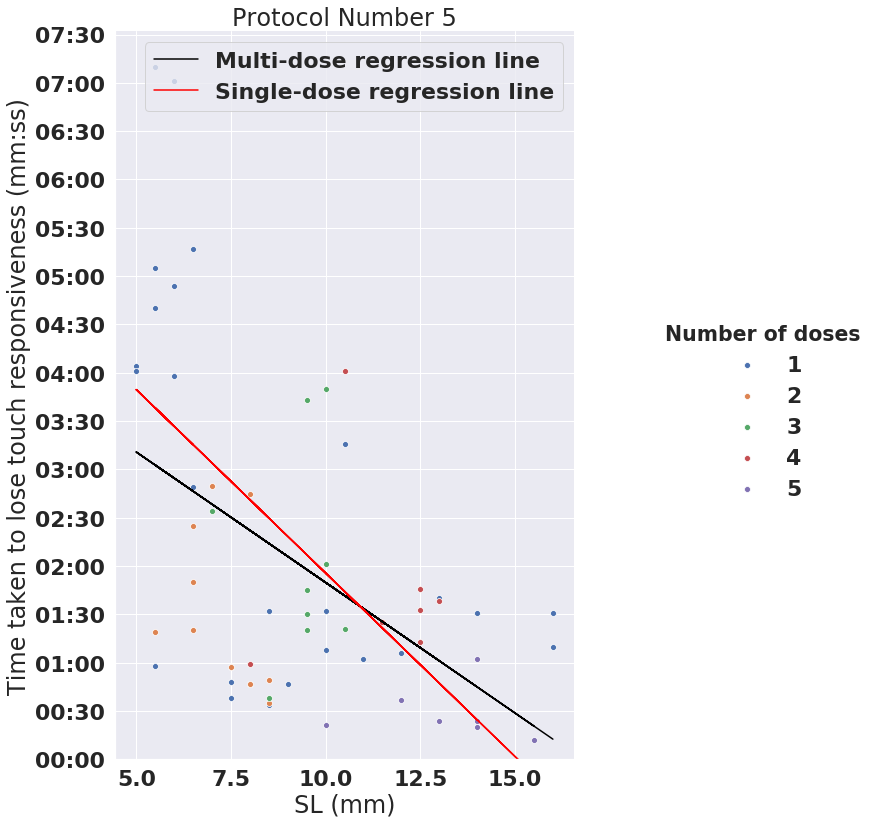

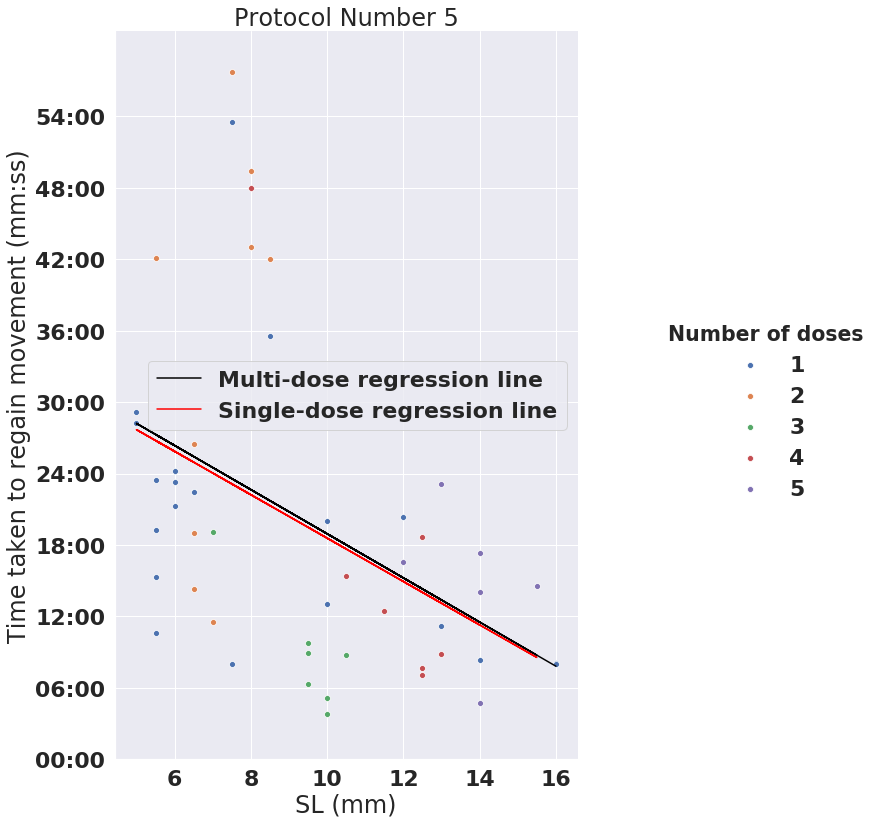

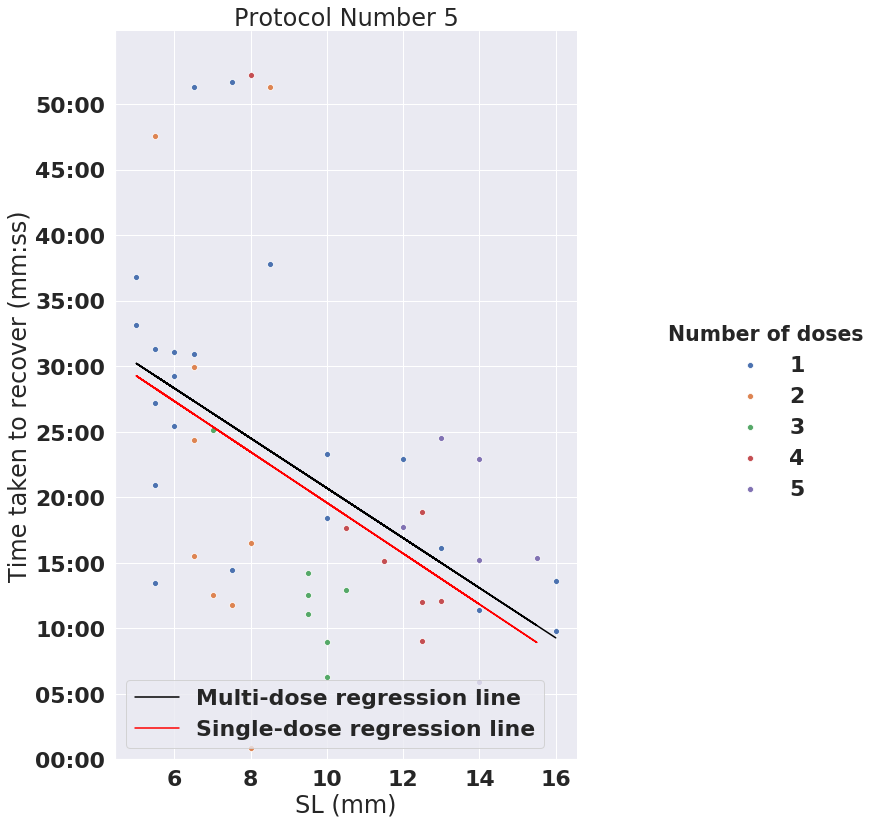

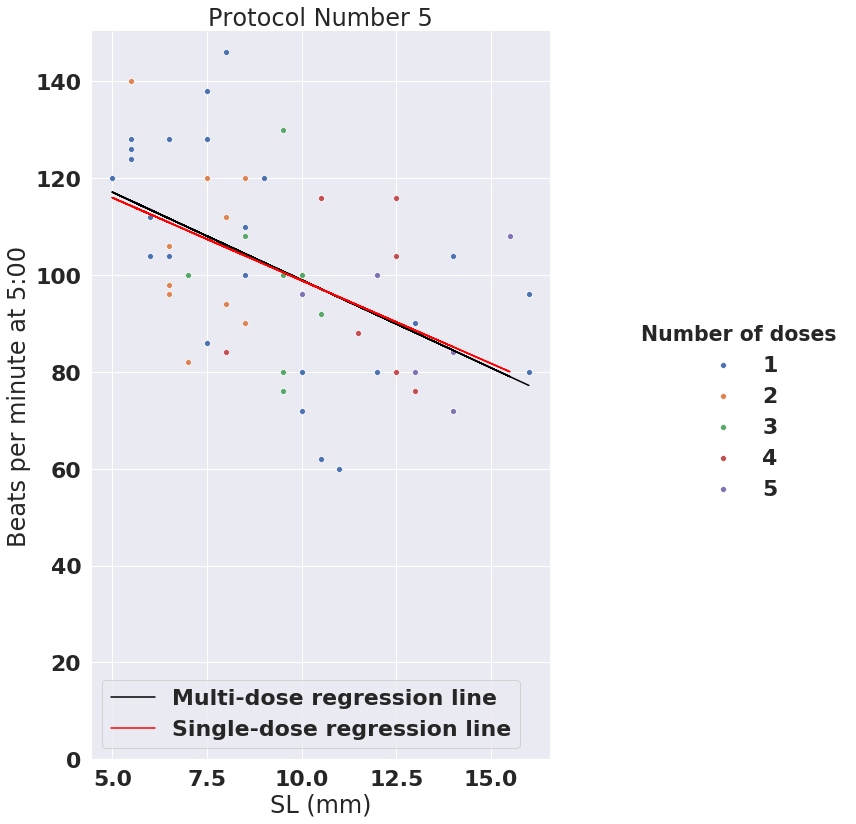

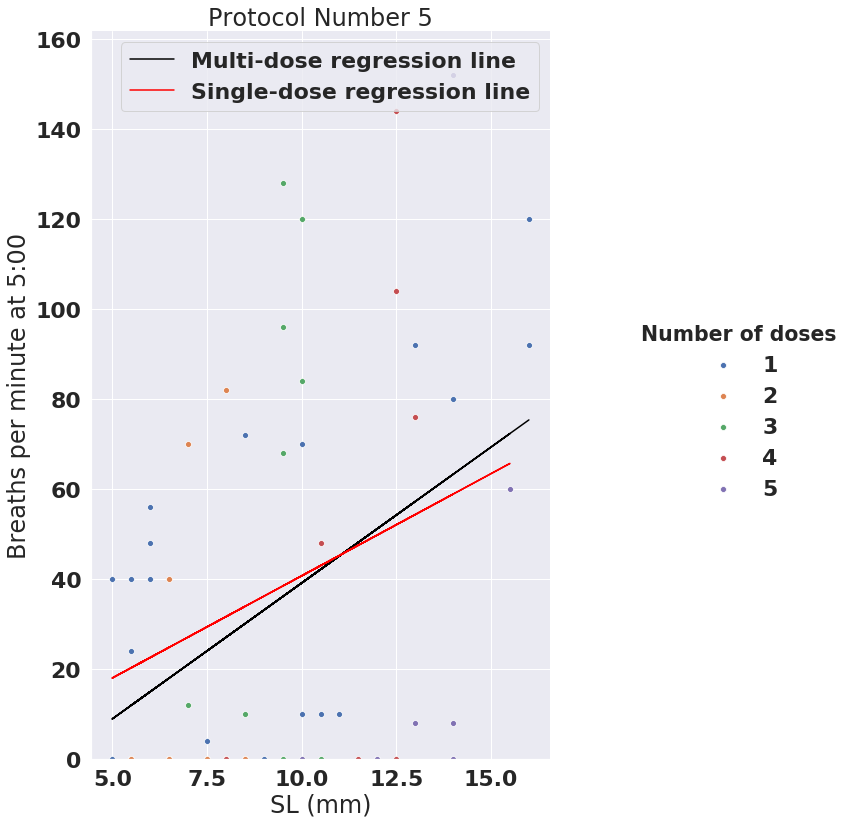

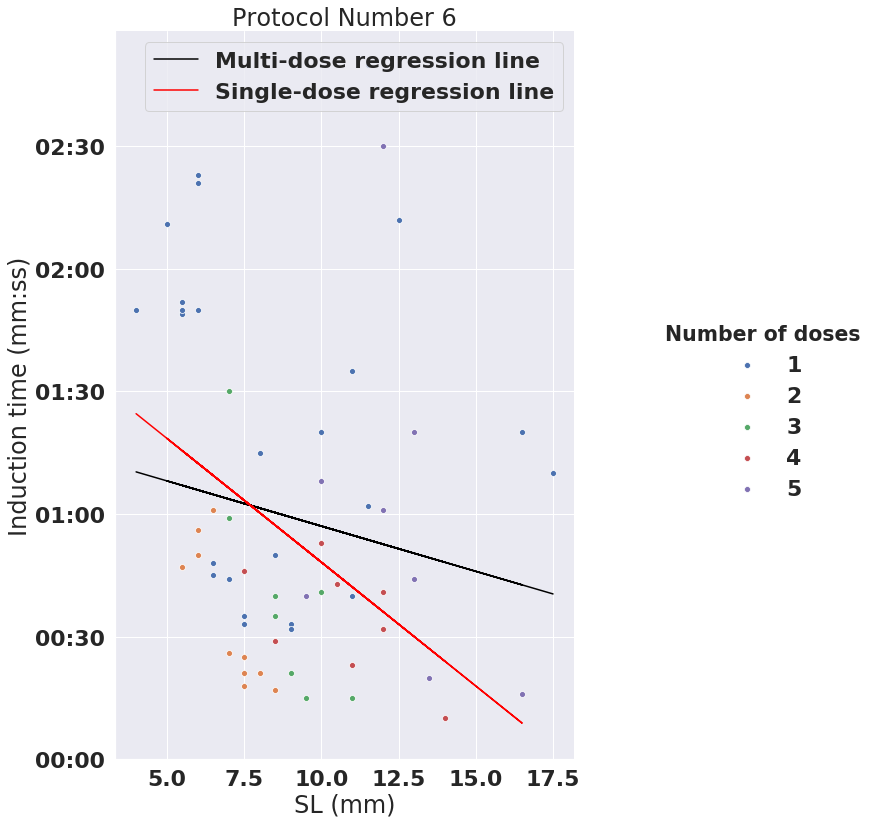

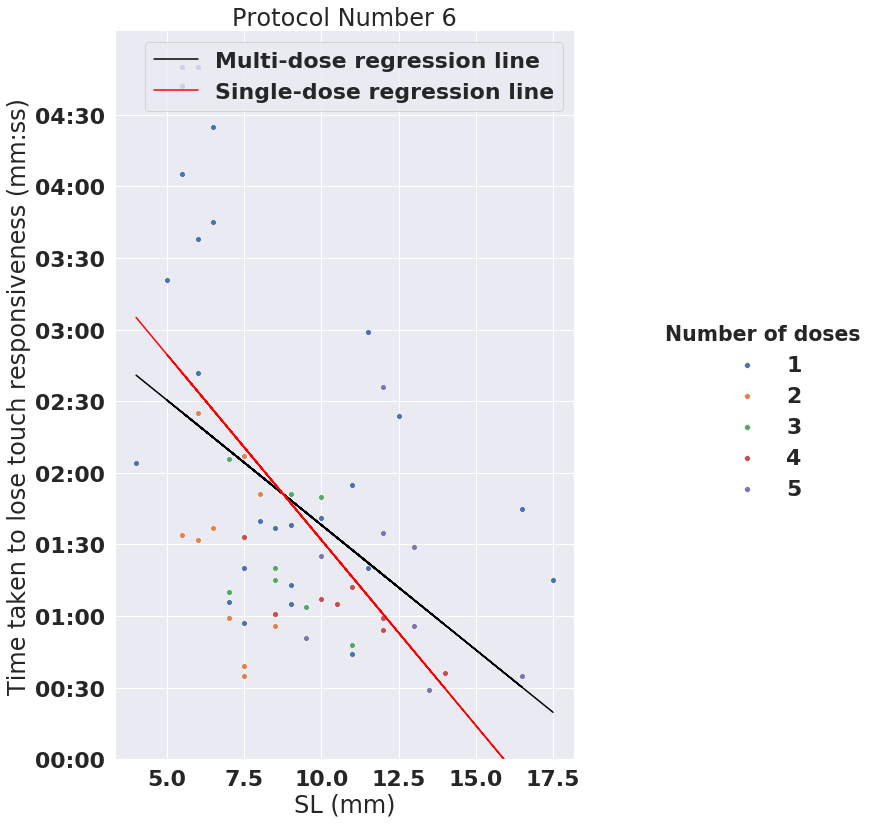

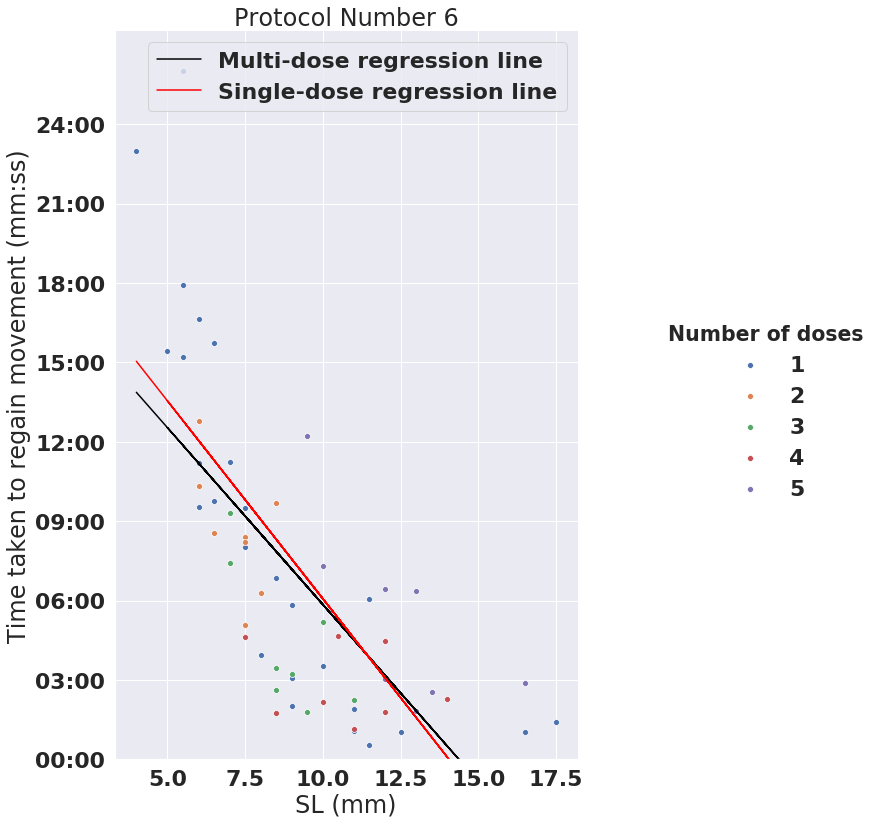

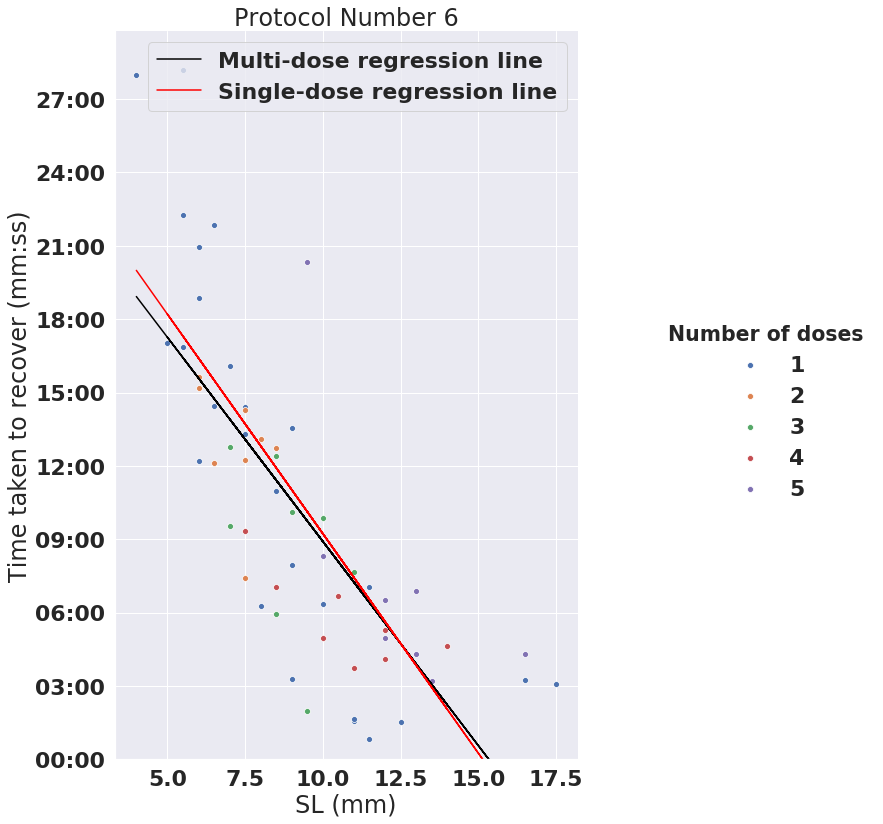

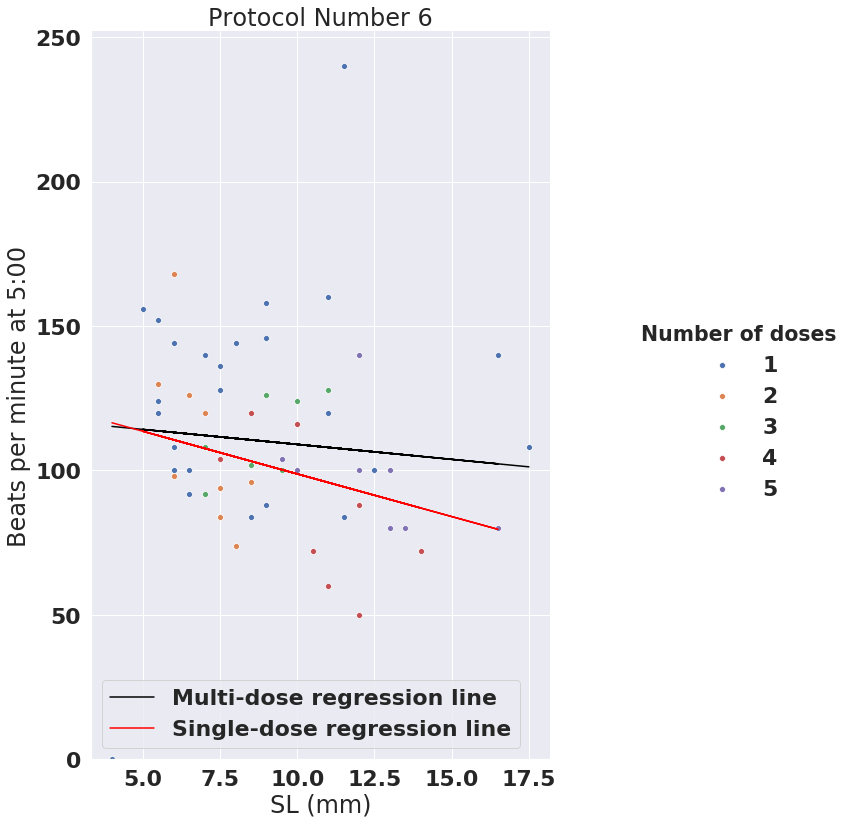

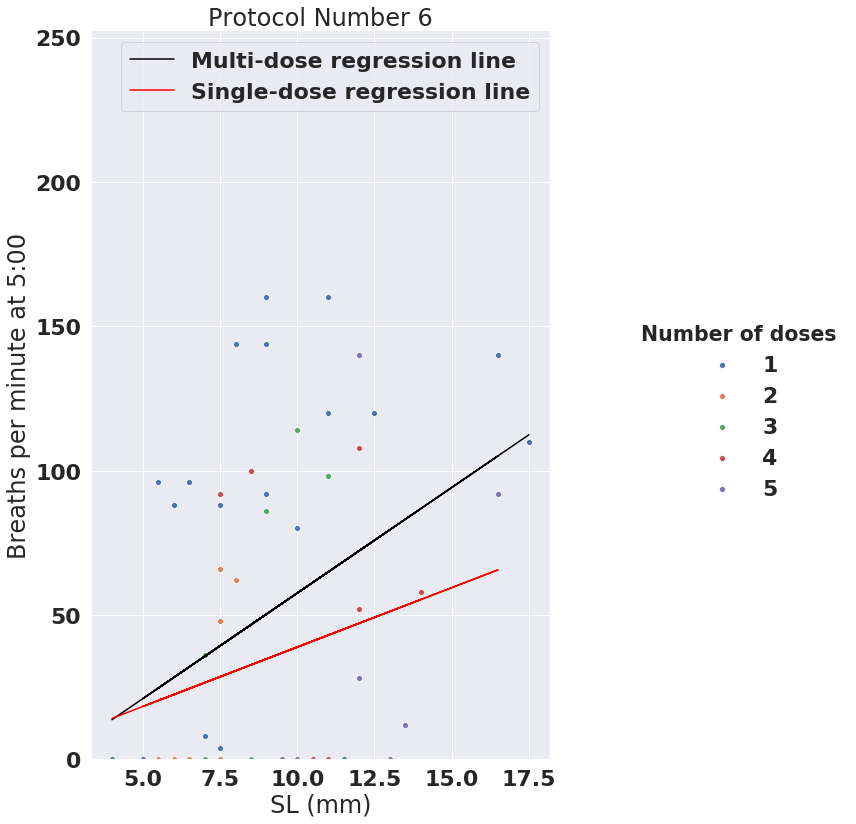

In [17]:
#Generates all my plots and statistical studies.
protocol = ['1','4','5','6']

#Convert to seconds
for j in protocol:
    print(j)
    p_df=df[df.P==j]
    
    for i,k in [('Induction_time_sec', 'Induction time (mm:ss)'),('Lose_TR_time_sec', 'Time taken to lose touch responsiveness (mm:ss)'),('TT_movement_sec', 'Time taken to regain movement (mm:ss)'),('TT_Recovery_sec','Time taken to recover (mm:ss)'),('RR_beats','Beats per minute at 5:00'),('RR_breaths', 'Breaths per minute at 5:00')]:
 
        for inc_control in ['_with_control','_without_control']:
        
        
            if inc_control=='_without_control':
            #Drop data points where repeat number is 1 as control
                My_df = p_df.drop(p_df[(p_df.Repeat_no < 2) &  (p_df.Age > 21)].index)
            else:
                My_df= p_df
        
            ##Protocol number vs ....
        
            ##STATISTICAL SIGNIFICANCE SECTION
            #See if there is a significant difference between any repeat numbers 
            save_rep=[]
            t_mat=np.zeros((6,6))
            p_mat=np.zeros((6,6))
            
            for rep_no in range(1,6):
                rep_df=My_df.query('Repeat_no == @rep_no')
                #save_rep contains the list of values in column 'i' for each repeat number.
                save_rep.append(rep_df[i])
            
            for rep_i in range(0,5):
                for rep_j in range(0,5):
                    #All combinations of significance saved into an array!
                    t_ij,p_ij=stats.ttest_ind(save_rep[rep_i],save_rep[rep_j], nan_policy='omit')
                    t_mat[rep_i,rep_j]=t_ij
                    p_mat[rep_i,rep_j]=p_ij
            
            #PLOT FIGURE
            fig, axes = plt.subplots(figsize=(10,8))
            sns.set(font_scale=2)
            tips = My_df.dropna(how='all')
            ax=sns.boxplot(x="Repeat_no", y=i, data=tips)
            # add swarmplot
            ax=sns.swarmplot(x="Repeat_no", y=i, data=tips, color='black', alpha=0.75)
            
            #CHANGE TITLE
            if inc_control=='_without_control':
            #Drop data points where repeat number is 1 as control
                ax.set(title='Protocol Number '+j)
            else:
                ax.set(title='Protocol Number '+j+inc_control.replace('_', ' '))
            
            #CHANGE AESTHETICS
            #Changes the colours used in the boxplot
            colors = sns.color_palette('bright',n_colors=6)
            for artist,color in zip(ax.artists,colors):
                artist.set_facecolor(color)
                artist.set_edgecolor(color)
            
            #PLOT STATISTICAL SIGNIFICANCE
            #Add statistical significance to the plot
            if inc_control=='_without_control':
                #Only test significance between subsequent repeat numbers
                for l in range(4):
                 #statistical annotation (plot * or  ns if not significant)
                    x1 = l
                    x2 = l+1   # columns 
                    y, h, col = tips[i].max() + 100, 1, 'k'
                    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
                    plt.text((x1+x2)*.5, y+h, stars(p_mat[l,l+1]), ha='center', va='bottom', color=col)
            else:
                #Only test significance between 1 repeat and repeats>1
                for l in range(4):
                 #statistical annotation (plot * or  ns if not significant)
                    x1 = 0
                    x2 = l+1   # columns 
                    y, h, col = tips[i].max() + 100*(l+1), 1, 'k'
                    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
                    plt.text((x1+x2)*.5, y+h, stars(p_mat[0,l+1]), ha='center', va='bottom', color=col)
            
            if i!='RR_beats' and i!='RR_breaths':
                #Change the plot axis to time
                list=[]  
                #In minutes
                inc=max([np.int(np.round(max(p_df[i])/600)),1])
                additional_space=3*inc
                y_lim_max=np.int(np.round(max(p_df[i]))/60)+additional_space
                #In seconds
                y_actual_max=y_lim_max*60
                #additional space for extra plotting at the top (*'s etc.)
                if y_lim_max>9:
                    #If greater than 9 then change the increment size.
                    if y_lim_max>=60:
                        ax.set(xlabel='Repeat Number', ylabel=k.replace('mm:ss','hh:mm:ss'))
                        #If greater than 60 then the time formatting needs to change
                        for time in np.arange(y_lim_max, step=inc):
                            if time>=60:
                                if 60-time<9:
                                    list.append('01:0'+str(np.int(time-60))+':00')
                                else:
                                    list.append('01:'+str(np.int(time-60))+':00')
                            elif time>9:
                                list.append('00:'+str(np.int(time))+':00')
                            else:
                                list.append('00:0'+str(np.int(time))+':00')
                    else:
                        ax.set(xlabel='Repeat Number', ylabel=k)
                        for time in np.arange(y_lim_max, step=inc):
                            if time>9:
                                list.append(str(time)+':00')
                            else:
                                list.append('0'+str(time)+':00')
                    plt.yticks(np.arange(y_actual_max, step=inc*60), list)
                elif y_lim_max>1:
                    ax.set(xlabel='Repeat Number', ylabel=k)
                #For small values add :30 increments.
                    for time in np.arange(y_lim_max, step=1):
                        list.append('0'+str(time)+':00')
                        list.append('0'+str(time)+':30')
                    plt.yticks(np.arange(y_actual_max, step=30), list)
                else: # Less than 1 minute
                    for time in np.arange(y_lim_max*60, step=10):
                        list.append('00:'+str(time))                
                    plt.yticks(np.arange(y_actual_max, step=10), list)
            else:
                ax.set(xlabel='Repeat Number', ylabel=k)
            
            plt.savefig(i+'Protocol_'+j+inc_control+'.png',bbox_inches='tight')
            plt.close(fig)

        #plt.savefig(i+'Protocol_'+j+'.eps',bbox_inches='tight')
        
        ##Size vs ....
        My_df= p_df
        tips = My_df.dropna(how='all')
        ax=sns.pairplot(x_vars="SL", y_vars=i, data=tips, hue="Repeat_no", height=5)
        ax.set(xlabel='SL (mm)', ylabel=k)
        ax.set(title='Protocol Number '+j)
        ax._legend.set_title('Number of doses')

        ax.fig.set_size_inches(15,15)
        
        for My_df , colour, my_label in [(p_df,'black', 'Regression line for repeated dose'), (p_df.drop(p_df[(p_df.Repeat_no < 2) &  (p_df.Age > 21)].index),'red','Regression line for single dose')]:
        #Linear regression for SL v i with controls and repeated doses.
            tips = My_df.dropna(how='all')
            #Drop all empty rows 
            tips.dropna(subset=[i], inplace=True)
            X = tips['SL'].values.reshape(-1, 1)  # values converts it into a numpy array
            Y = tips[i].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
            linear_regressor = LinearRegression()  # create object for the class
            linear_regressor.fit(X, Y)  # perform linear regression
            Y_pred = linear_regressor.predict(X)  # make predictions
        
            line, = plt.plot(X, Y_pred, color=colour)
            line.set_label(my_label)
            
        
        if i!='RR_beats' and i!='RR_breaths':
                #Change the plot axis to time
            list=[]
                #additional space for extra plotting at the top (*'s etc.)
            additional_space=1
            y_lim_max=np.int(max(p_df[i])/60)+additional_space
            y_actual_max=y_lim_max*60
            if y_lim_max>9:
                #If greater than 9 then change the increment size.
                inc=max([np.int(np.round(y_lim_max/10)),1])
                if y_lim_max>=60:
                    ax.set(xlabel='SL (mm)', ylabel=k.replace('mm:ss','hh:mm:ss'))
                    #If greater than 60 then the time formatting needs to change
                    for time in np.arange(y_lim_max, step=inc):
                        if time>=60:
                            if 60-time<9:
                                list.append('01:0'+str(np.int(time-60))+':00')
                            else:
                                list.append('01:'+str(np.int(time-60))+':00')
                        elif time>9:
                            list.append('00:'+str(np.int(time))+':00')
                        else:
                            list.append('00:0'+str(np.int(time))+':00')
                else: #<60 but >9 
                    ax.set(xlabel='SL (mm)', ylabel=k)
                    for time in np.arange(y_lim_max, step=inc):
                        if time>9:
                            list.append(str(time)+':00')
                        else:
                            list.append('0'+str(time)+':00')
                plt.yticks(np.arange(y_actual_max, step=inc*60), list)
            elif y_lim_max>1:
                ax.set(xlabel='SL (mm)', ylabel=k)
                #For small values add :30 increments.
                for time in np.arange(y_lim_max, step=1):
                    list.append('0'+str(time)+':00')
                    list.append('0'+str(time)+':30')
                plt.yticks(np.arange(y_actual_max, step=30), list)
            else: # Less than 1 minute
                for time in np.arange(y_lim_max*60, step=10):
                    list.append('00:'+str(time))                
                plt.yticks(np.arange(y_actual_max, step=10), list)    
        else:
            ax.set(xlabel='SL (mm)', ylabel=k)
        
        plt.legend(['Multi-dose regression line', 'Single-dose regression line'])
        plt.ylim(ymin=0)
        #Multivariate linear regression with repeat number and size (SL) Fit an OLS model.        
        #tips = p_df.dropna(how='all')
        #X = tips[['Repeat_no','SL']] 
        #Y = tips[i]
        #model = sm.OLS(Y, X).fit()
        #predictions = model.predict(X) 
        #Print results from the model
        #print(k+' Protocol '+j)
        #print(model.summary())
        #colors = sns.color_palette('bright',n_colors=6)
        
        
        plt.close(fig)

        
        plt.savefig('SL_'+i+'Protocol_'+j+'.png',bbox_inches='tight')
        #plt.savefig('SL_'+i+'Protocol_'+j+'.eps',bbox_inches='tight')
        